# QuantumSim - Qubit Reset
Author: Nico Kuijpers<br>
Date: January 2, 2025

In this notebook it is explained how a reset of a single qubit is implemented in QuantumSim.

Resetting a qubit requires the measurement of that qubit. Measurement of a single qubit in QuantumSim is introduced in this notebook:

https://github.com/nicokuijpers/QuantumSim/blob/main/QuantumSimQubitMeasurement.ipynb

In [1]:
from quantumsim import *

## Introduction
For some applications it is required to reset the state of a single qubit $q$ to $|0\rangle$ and change the quantum state of the circuit accordingly.
This is achieved by first obtaining the probabilities of measurement outcome $|0\rangle$ or $|1\rangle$ for qubit $q$ and then letting collapse its 
state to either $|0\rangle$ or $|1\rangle$ depending on a random number between $0$ and $1$. 
In case the qubit collapses to $|0\rangle$, the reset operation is complete. In case the qubit collapses to $|1\rangle$ a 
Pauli X operation is applied to that qubit to bring it into state $|0\rangle$.

To implement this approach in QuantumSim, class *StateVector* has been extended with a method *reset_qubit()* as defined below.

In [2]:
"""
Class representing the quantum state of a quantum circuit of N qubits.
"""
class StateVector:

    def reset_qubit(self, q):
        measured_value = self.measure_qubit(q)
        if measured_value == 1:
            combined_operation_pauli_x = CircuitUnitaryOperation.get_combined_operation_for_pauli_x(q, self.N)
            self.apply_unitary_operation(combined_operation_pauli_x)

## Example: Bell state
Below, a circuit of $2$ qubits is defined to create the $|\phi^{+}\rangle$ Bell state defined by

$|\phi^{+}\rangle = \frac{1}{\sqrt{2}} (|00\rangle + |11\rangle)$.

After establishing the Bell state, qubit $0$ is reset. Upon resetting qubit $0$, also the state of qubit 1 is determined.

Intermediate probabilities are shown using function *QuantumUtil.show_all_probabilities()*. 
It can be observed that measuring the state of qubit $0$ also determines the state of qubit $1$.

Measured state |01>


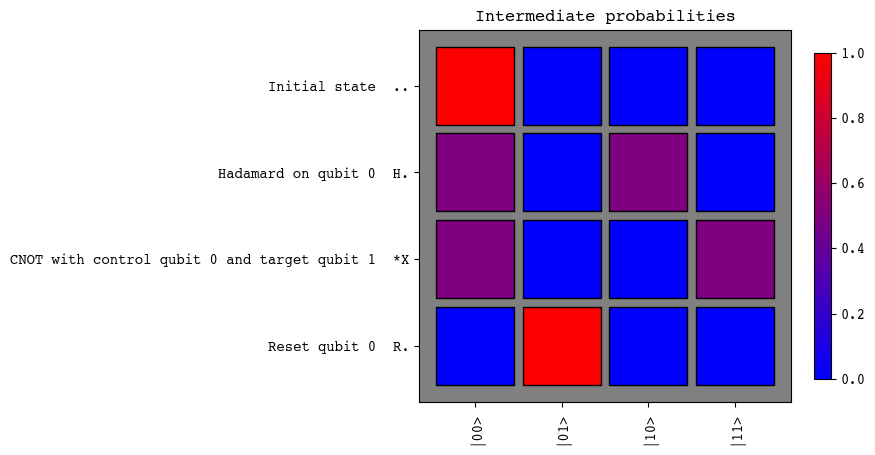

In [3]:
circuit = Circuit(2)
circuit.hadamard(0)
circuit.cnot(0,1)
circuit.reset_qubit(0)
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')
QuantumUtil.show_all_probabilities(circuit)


Run the code block above multiple times and confirm that the state after resetting qubit $0$ is either $|00\rangle$ or $|01\rangle$.

Now, we run this circuit $1000$ times using method *QuantumUtil.run_circuit()*. A histogram showing the occurrences of measured classical states is then created by calling method *QuantumUtil.histogram_of_classical_states()*. The states $|00\rangle$ and $|11\rangle$ should each occur about $500$ times.

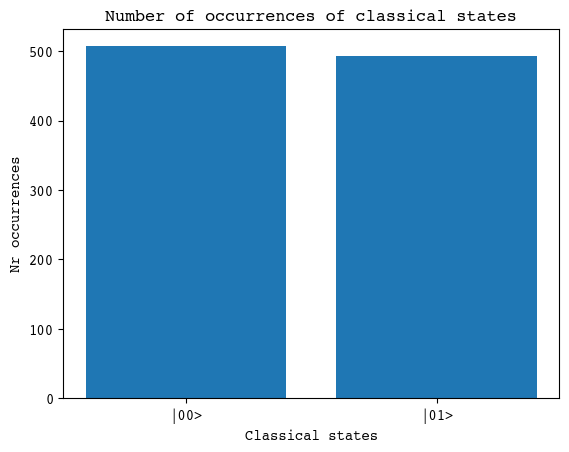

In [4]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)

## Example: Greenberger-Horne-Zeilinger state
The Greenberger-Horne-Zeilinger (GHZ) state is an entangled quantum state involving 3 or more qubits. The GHZ state for 3 qubits is defined by

$|\text{GHZ}\rangle = \frac{|000\rangle + |111\rangle}{\sqrt{2}}$

Below a circuit of $3$ qubits is defined to create a GHZ state. 
After establishing the GHZ state, qubit $1$ is reset. Upon resetting the state of qubit $1$, also the state of the other qubits is determined.

As before, intermediate probabilities are shown. Run the code block below multiple times to confirm that resetting qubit 1 determines the final state to be either $|000\rangle$ or $|101\rangle$.

Measured state |101>


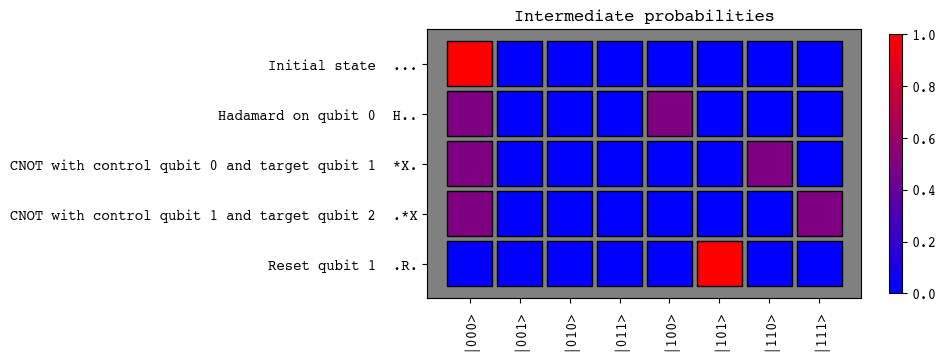

In [5]:
circuit = Circuit(3)
circuit.hadamard(0)
circuit.cnot(0,1)
circuit.cnot(1,2)
circuit.reset_qubit(1)
circuit.execute()
circuit.measure()
state_as_string = circuit.get_classical_state_as_string()
print(f'Measured state {state_as_string}')
QuantumUtil.show_all_probabilities(circuit)


Now, we run this circuit $1000$ times and create a histogram showing the occurrences of measured classical states. 
The states $|000\rangle$ and $|101\rangle$ should each occur about $500$ times.

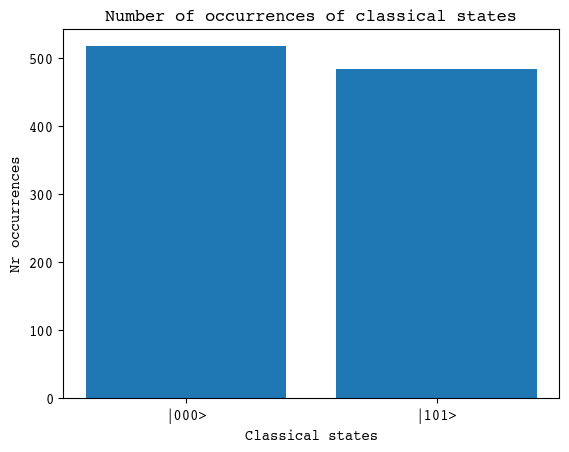

In [6]:
result = QuantumUtil.run_circuit(circuit, nr_runs=1000)
QuantumUtil.histogram_of_classical_states(result)